## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code three helper methods:

* random array generator
* array printer
* copyArray

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [3]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

## Binary Tree

A single array can be used to represent a binary tree.

The node at the root is indexed 0 in the array. All other nodes are numbered from left to right level by level and from top to bottom. Empty nodes are also numbered. Then each node having an index i is put into the array as its ith element.

![binary](images/binary.png)

The most important thing to learn from the array representation is the relationship of indexes among nodes. 

*First*, given an arbitrary node indexed i in the array representation, the indexes of its left and right chidren are:

```
left child:  2*i + 1
right child: 2*i + 2
```

*Second*, given an arbitrary node indexed i in the array representation, the index of its parent is:
```
parent: (i-1) / 2
```

*Third*, the number of nodes at levels above the leaf level is smaller than or equal to the size of binary tree divided by 2.

*Fourth*, given the size of a binary tree s, the index of the node that:

* sits one level above the leaft level 
* is the most right node has at least one child (at that level)

can be expressed as
```
the index of the last parent: s / 2 - 1
```

You may want to check a few examples in the above picture by this rule. The proof is beyond the scope of this tutorial. 

Additionally, for a binary tree, when its all levels except for the last one are completely filled, we call it **a complete binary tree**. It is worth noting that when the bottom level is being filled with nodes, it has be from left to right.

## Binary Heap

A heap is firstly a complete binary tree. A heap has more properties than a complete binary tree, specifically on the order of nodes by their values. There are two types of heaps:

* Max heap: For any given node, the value of a parent node is bigger than its children.
* Min heap: For any given node, the value of a parent node is smaller than its children.

Heap is an excellent candidate for your sorting tasks, if your sorting tasks involve:

* Need to have a sorted result even with incomplete data
* Constantly add new elements
* Constantly delete some old elements

Now let's implement a binary heap. Given a set of unsorted values, what do we do to build a binary heap out of them? The naive strategy is **to start with an empty heap and add values one by one**. Let's do that.

In [4]:
// this is a max heap
public class Heap{
    // we go with arraylist instead of array for size flexibility
    ArrayList<Integer> data;
    
    // constructor
    public Heap() {
        data = new ArrayList<Integer>(0);
    }
}

Let's add another method "insert" that takes care of adding a new element to the heap. To add a new element to an existing heap, we will following this strategy:

1. Add the element to the bottom level of the heap.
2. Compare the added element with its parent; if they are in the correct order, stop.
3. If not, swap the element with its parent and return to the previous step.

In [5]:
// this is a max heap
public class Heap{
    // we go with arraylist instead of array for size flexibility
    ArrayList<Integer> data;
    
    // constructor
    public Heap() {
        data = new ArrayList<Integer>(0);
    }
    
    // print all elements
    public void print() {
        for (int i = 0; i < data.size(); i++) {
            System.out.print(data.get(i) + " ");
        }
        System.out.println();
    }
    
    // insert
    public void insert(int val) {
        data.add(val);
        int i = data.size() - 1;
        
        percUp(i);
    }
    
    // percolate element at index i to the top if necessary
    private void percUp(int i) {
        while (i > 0 && (i-1)/2 >= 0) {
            if (data.get(i) > data.get((i-1)/2)) {
                int tmp = data.get(i);
                data.set(i, data.get((i-1)/2));
                data.set((i-1)/2, tmp);
            }
            
            i = (i-1)/2;
        }
    }
}

// sanity check
// note that the printed heap is not fully sorted, and it should be like that
int[] arr = randomArr(5);
System.out.print("A given array: ");
printArr(arr);

Heap h = new Heap();
for (int num : arr) {
    h.insert(num);
}

System.out.print("Heap built: ");
h.print();

A given array: 783 685 762 492 138 
Heap built: 783 685 762 492 138 


You may have noticed that when we print out the heap, it is not fully sorted. There is nothing wrong with it. It is intended to be like this. However, one thing is for sure --- the biggest element always stays at the root for a max heap. If we want to retrieve a fully sorted sequence, we can keep removing the root and restore the property of max heap. To achieve this, we need at least two more methods **removeMax** and **heapify**.

In [6]:
// this is a max heap
public class Heap{
    // we go with arraylist instead of array for size flexibility
    ArrayList<Integer> data;
    
    // constructor
    public Heap() {
        data = new ArrayList<Integer>(0);
    }
    
    // print all elements
    public void print() {
        for (int i = 0; i < data.size(); i++) {
            System.out.print(data.get(i) + " ");
        }
        System.out.println();
    }
    
    // insert
    public void insert(int val) {
        data.add(val);
        int i = data.size() - 1;
        
        percUp(i);
    }
    
    // percolate element at index i to the top if necessary
    private void percUp(int i) {
        while (i > 0 && (i-1)/2 >= 0) {
            if (data.get(i) > data.get((i-1)/2)) {
                int tmp = data.get(i);
                data.set(i, data.get((i-1)/2));
                data.set((i-1)/2, tmp);
            }
            
            i = (i-1)/2;
        }
    }
    
    // removeMax
    public int removeMax() {
        int val = data.get(0);
        data.remove(0);
        heapify(0);
        return val;
    }
    
    // heapify
    private void heapify(int i) {
        while (2*i+1 < data.size()) {
            int maxChildIndex = maxChild(i);
            if (data.get(i) < data.get(maxChildIndex)) {
                int tmp = data.get(maxChildIndex);
                data.set(maxChildIndex, data.get(i));
                data.set(i, tmp);
            }
            
            i = maxChildIndex;
        }
    }
    
    // return the index of maxChild
    private int maxChild(int i) {
        int li = 2*i+1, ri = 2*i+2;
        
        if (ri >= data.size() || data.get(li) > data.get(ri)) {
            return li;
        } else {
            return ri;
        }
    }
}

// sanity check
int[] arr = randomArr(5);
System.out.print("A given array: ");
printArr(arr);

Heap h = new Heap();
for (int num : arr) {
    h.insert(num);
}

System.out.print("Reversely sorted: ");
while (h.data.size() > 0) {
    System.out.print(h.removeMax() + " ");
}

A given array: 776 832 70 721 877 
Reversely sorted: 877 832 776 721 70 

Let's revisit a question we previously asked: *Given a set of unsorted values, what do we do to build a binary heap out of them?*

The naive strategy is **to start with an empty heap and add values one by one**. We covered it.

The more optimized strategy is **to treat the given array as a heap and help it to restore its heap properties**. To achieve this, we need a new method.

In [7]:
// this is a max heap
public class Heap{
    // we go with arraylist instead of array for size flexibility
    ArrayList<Integer> data;
    
    // constructor
    public Heap() {
        data = new ArrayList<Integer>(0);
    }
    
    // print all elements
    public void print() {
        for (int i = 0; i < data.size(); i++) {
            System.out.print(data.get(i) + " ");
        }
        System.out.println();
    }
    
    // insert
    public void insert(int val) {
        data.add(val);
        int i = data.size() - 1;
        
        percUp(i);
    }
    
    // percolate element at index i to the top if necessary
    private void percUp(int i) {
        while (i > 0 && (i-1)/2 >= 0) {
            if (data.get(i) > data.get((i-1)/2)) {
                int tmp = data.get(i);
                data.set(i, data.get((i-1)/2));
                data.set((i-1)/2, tmp);
            }
            
            i = (i-1)/2;
        }
    }
    
    // removeMax
    public int removeMax() {
        int val = data.get(0);
        data.remove(0);
        heapify(0);
        return val;
    }
    
    // heapify
    private void heapify(int i) {
        while (2*i+1 < data.size()) {
            int maxChildIndex = maxChild(i);
            if (data.get(i) < data.get(maxChildIndex)) {
                int tmp = data.get(maxChildIndex);
                data.set(maxChildIndex, data.get(i));
                data.set(i, tmp);
            }
            
            i = maxChildIndex;
        }
    }
    
    // return the index of maxChild
    private int maxChild(int i) {
        int li = 2*i+1, ri = 2*i+2;
        
        if (ri >= data.size() || data.get(li) > data.get(ri)) {
            return li;
        } else {
            return ri;
        }
    }
    
    // heap builder
    public void build(int[] arr) {
        // load elements to data
        for (int num: arr) {
            data.add(num);
        }
        
        // heapify
        for (int i = data.size()/2 -1; i >= 0; i--) {
            heapify(i);
        }
    }
}

// sanity check
int[] arr = randomArr(5);
System.out.print("A given array: ");
printArr(arr);

Heap h = new Heap();
h.build(arr);

System.out.print("Reversely sorted: ");
while (h.data.size() > 0) {
    System.out.print(h.removeMax() + " ");
}

A given array: 124 499 666 880 357 
Reversely sorted: 880 666 499 357 124 

Let's upgrade our code so we can track the time complexitiy of the two approaches of building heaps.

In [8]:
// this is a max heap
public class HeapTrack{
    // we go with arraylist instead of array for size flexibility
    ArrayList<Integer> data;
    
    // constructor
    public HeapTrack() {
        data = new ArrayList<Integer>(0);
    }
    
    // print all elements
    public void print() {
        for (int i = 0; i < data.size(); i++) {
            System.out.print(data.get(i) + " ");
        }
        System.out.println();
    }
    
    // insert
    public int insert(int val) {
        int steps = 1 + data.size();
        
        data.add(val);
        int i = data.size() - 1;
        
        steps += percUp(i);
        
        return steps;
    }
    
    // percolate element at index i to the top if necessary
    private int percUp(int i) {
        int steps = 0;
        
        while (i > 0 && (i-1)/2 >= 0) {
            if (data.get(i) > data.get((i-1)/2)) {
                int tmp = data.get(i);
                data.set(i, data.get((i-1)/2));
                data.set((i-1)/2, tmp);
                
                steps += 3;
            }
            
            i = (i-1)/2;
            steps += 2;
        }
        
        return steps;
    }
    
    // removeMax
    public int removeMax() {
        int val = data.get(0);
        data.remove(0);
        heapify(0);
        return val;
    }
    
    // heapify
    private int heapify(int i) {
        int steps = 0;
        
        while (2*i+1 < data.size()) {
            int[] results = maxChild(i);
            int maxChildIndex = results[0];
            steps += results[1];
            
            if (data.get(i) < data.get(maxChildIndex)) {
                int tmp = data.get(maxChildIndex);
                data.set(maxChildIndex, data.get(i));
                data.set(i, tmp);
                
                steps += 3;
            }
            
            i = maxChildIndex;
            steps += 2;
        }
        
        return steps;
    }
    
    // return the index of maxChild
    private int[] maxChild(int i) {
        int[] results = new int[2];
        
        int li = 2*i+1, ri = 2*i+2;
        
        if (ri >= data.size() || data.get(li) > data.get(ri)) {
            results[0] = li;
        } else {
            results[0] = ri;
        }
        
        int steps = 4;
        results[1] = steps;
        return results;
    }
    
    // heap builder
    public int build(int[] arr) {
        int steps = 0;
        
        // load elements to data
        for (int num: arr) {
            data.add(num);
        }
        
        steps += data.size();
        
        // heapify
        for (int i = data.size()/2 -1; i >= 0; i--) {
            steps += heapify(i);
        }
        
        return steps;
    }
}

// sanity check
int[] arr = randomArr(5);
System.out.print("A given array: ");
printArr(arr);

HeapTrack h = new HeapTrack();
h.build(arr);

System.out.print("Reversely sorted: ");
while (h.data.size() > 0) {
    System.out.print(h.removeMax() + " ");
}

A given array: 914 442 196 700 849 
Reversely sorted: 914 849 700 442 196 

Now let's plot the comparison between the two heap building approaches. By looking at the comparison, it is easy to conclude that the second strategy is more effective. As the size of input grows, the efficiency difference grows.

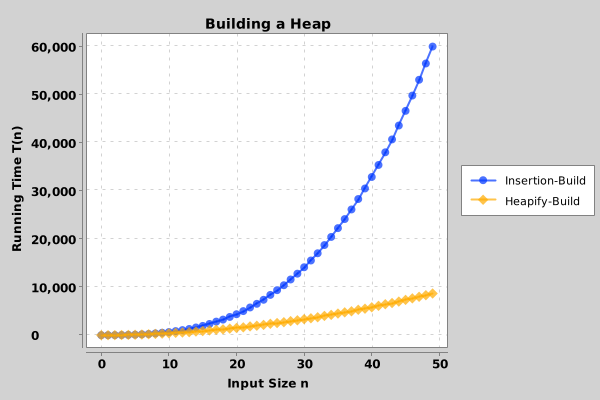

In [9]:
// predetermined size
int size = 50;

// storage of steps
int[] heapInsertArr = new int[size];
int[] heapBuildArr = new int[size];

// heap
HeapTrack heapInsert = new HeapTrack();
HeapTrack heapBuild = new HeapTrack();

// populate storage
for (int i = 1; i < size; i++) {
    // prepare two exactly same sorted arrays
    int[] temp1 = randomArr(i);
    int[] temp2 = new int[temp1.length];
    copyArray(temp1, temp2);
    
    // insert build
    heapInsertArr[i] = 0;
    for (int num : temp1) {
        heapInsertArr[i] += heapInsert.insert(num);
    }
    // build
    heapBuildArr[i] = heapBuild.build(temp2);
}

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// heapInsert
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = heapInsertArr[i];
}

// heapBuild
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = heapBuildArr[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Building a Heap").xAxisTitle("Input Size n").yAxisTitle("Running Time T(n)").build();
chart.addSeries("Insertion-Build", xData, yDataB);
chart.addSeries("Heapify-Build", xData, yDataN);
BitmapEncoder.getBufferedImage(chart);

## Do It Yourself

#### Practice - median finder

Median is the middle value in an ordered integer list. If the size of the list is even, the median is the mean of the two middle value.

Examples:
```
[2, 3, 4] -> the median is 3
[2, 3]    -> the median is (2 + 3) / 2 = 2.5
```

Design a data structure that supports the following two operations:

* void addNum(int num) - Add a integer number from the data stream to the data structure.
* double findMedian() - Return the median of all elements so far.

You can have as many helper methods as you want. The code skeleton is provided to you.

*Hint: You may consider using PriorityQueue in Java, which is essentially a min heap*

In [10]:
class MedianFinder {

    /** initialize your data structure here. */
    
    
    
    // Adds a number into the data structure
    public void addNum(int num) {

    }

    // Returns the median of current data stream
    public double findMedian() {
        // remove this line
        return 0;
    }

}

**When you finish (or not) playing your exploration of the whole interactive notebook and DIY assignment, you should download a html file and upload it to the assignment box on Canvas:**

* File --> Download as --> HTML (.html)

![download](images/html.png)